In [57]:
import pandas as pd
import numpy as np

In [58]:
url = 'https://raw.githubusercontent.com/aliciacaminero/Proyect_LEA/refs/heads/main/lego_harry_potter_sets.csv'
df = pd.read_csv(url)

In [59]:
# 1º vamos a eliminar las filas en las que todos sus datos son NaN
#df_hp.dropna(how='all', inplace=True) -> no hay

# Filtra las filas con NaN en las columnas especificadas
#df_nan = df[df[['PVP', 'Precio como Nuevo', 'Precio como Usado']].isna().any(axis=1)]

#df.dropna(subset=['Año de Lanzamiento', 'Precio como Nuevo', 'Precio como Usado'], inplace=True)


In [60]:
# Reemplaza valores no convertibles por NaN
df['Código del Set'] = pd.to_numeric(df['Código del Set'], errors='coerce')

# 2. Rellenar NaN con 0 (o eliminar filas, si prefieres) -> mejor a Int64
#df['Código del Set'] = df['Código del Set'].fillna(0)

df['Código del Set'] = df['Código del Set'].astype('Int64')

In [61]:
df['Precio como Nuevo'] = df['Precio como Nuevo'].str.lstrip('~')
df['Precio como Usado'] = df['Precio como Usado'].str.lstrip('~')

In [62]:
df.rename(columns={
    'PVP': 'PVP $',
    'Precio como Nuevo': 'Precio como Nuevo €',
    'Precio como Usado': 'Precio como Usado €'
}, inplace=True)

In [63]:
tasa_conversion = 1.10

# Limpiar la columna 'Precio como Nuevo' y transformar a dólares
df['Precio como Nuevo €'] = df['Precio como Nuevo €'].replace('Precio nuevo no disponible', np.nan)
df['Precio como Nuevo €'] = df['Precio como Nuevo €'].str.lstrip('€')
df['Precio como Nuevo $'] = df['Precio como Nuevo €'].astype(float) * tasa_conversion

# Limpiar la columna 'Precio como Usado' y transformar a dólares
df['Precio como Usado €'] = df['Precio como Usado €'].replace('Precio usado no disponible', np.nan)
df['Precio como Usado €'] = df['Precio como Usado €'].str.lstrip('€')
df['Precio como Usado $'] = df['Precio como Usado €'].astype(float) * tasa_conversion

# Adecuar columna PVP $
df['PVP $'] = df['PVP $'].replace('PVP no disponible', np.nan)
df['PVP $'] = df['PVP $'].str.lstrip('$')
df['PVP $'] = df['PVP $'].str.split(' | ').str[0]
df['PVP $'] = df['PVP $'].str.replace(',', '', regex=False)
df['PVP $'] = df['PVP $'].astype(float)


In [64]:
url2 = 'https://raw.githubusercontent.com/aliciacaminero/Proyect_LEA/refs/heads/main/lego_harry_potter_sets_dl.csv'
df_2 = pd.read_csv(url2)

In [65]:
df_reducido = df_2[['Number', 'YearFrom', 'SetName']]

In [66]:
df_reducido.loc[:, 'Number'] = pd.to_numeric(df_reducido['Number'],errors='coerce')

df_reducido.dropna(subset=['Number'], inplace=True)

df_reducido.loc[:, 'Number'] = df_reducido['Number'].astype(int)

/var/folders/8k/8w_q7kd116v1zrzns3x24cv80000gn/T/ipykernel_1400/69839567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.dropna(subset=['Number'], inplace=True)


In [67]:
merged_HP_df = pd.merge(df, df_reducido, left_on='Código del Set', right_on='Number', how='left')

In [68]:
#merged_HP_df.loc[:, 'YearFrom'] = merged_HP_df['YearFrom'].fillna(0)  # hay que sustituir NaN por un cero si quieres que pase a int -> si quieres mantener NaN Int64
merged_HP_df['YearFrom'] = merged_HP_df['YearFrom'].astype('Int64')

In [69]:
merged_HP_df.drop(columns=['Precio como Nuevo €', 'Precio como Usado €', 'Number'], inplace=True)

In [70]:
# Crear la nueva columna 'FinalSetName' usando fillna -> para que principalmente aparezca SetName pero si aqui hay un NaN sea sustituido por Nombre del Set
merged_HP_df['FinalSetName'] = merged_HP_df['SetName'].fillna(merged_HP_df['Nombre del Set'])

In [71]:
merged_HP_df.drop(columns=['Nombre del Set', 'SetName'], inplace=True)

In [72]:
new_orden = ['Código del Set', 'FinalSetName', 'Año de Lanzamiento', 'YearFrom', 'PVP $', 'Precio como Nuevo $', 'Precio como Usado $', 'Valoración de Usuarios']

HP_df = merged_HP_df[new_orden]

In [73]:
HP_df.rename(columns={
    'FinalSetName': 'Nombre del Set',
    'Año de Lanzamiento': 'Fecha de Lanzamiento',
    'YearFrom': 'Año de Lanzamiento'
}, inplace=True)

In [74]:
tipos_columnas = HP_df.dtypes

tipos_columnas

Código del Set             object
Nombre del Set             object
Fecha de Lanzamiento       object
Año de Lanzamiento          Int64
PVP $                     float64
Precio como Nuevo $       float64
Precio como Usado $       float64
Valoración de Usuarios     object
dtype: object

In [75]:
HP_df

,Código del Set,Nombre del Set,Fecha de Lanzamiento,Año de Lanzamiento,PVP $,Precio como Nuevo $,Precio como Usado $,Valoración de Usuarios
0,4695,Mini Harry Potter Knight Bus,1 Apr 2004 - 31 Dec 2004 (9m),2004,NaN,23.914,8.866,✭✭✭✭✩ 3.6 64 ratings 11 reviews
1,4701,Sorting Hat,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,7.0,87.659,13.563,✭✭✭✭✩ 3.4 154 ratings 19 reviews
2,4702,The Final Challenge,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,10.0,44.979,17.688,✭✭✭✭✩ 3.6 154 ratings 14 reviews
3,4704,The Chamber of the Winged Keys,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,20.0,91.707,35.123,✭✭✭✭✩ 3.7 95 ratings 9 reviews
4,4705,Snape's Class,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,20.0,67.727,31.515,✭✭✭✭✩ 3.8 121 ratings 13 reviews
...,...,...,...,...,...,...,...,...
171,<NA>,Knight Bus,Año no disponible,<NA>,NaN,NaN,NaN,NaN
172,<NA>,Voldemort,Año no disponible,<NA>,0.0,NaN,NaN,NaN
173,<NA>,Golden Snitch,Año no disponible,<NA>,NaN,10.439,12.441,NaN
174,<NA>,Quidditch Tower (TRU Event Exclusive),Año no disponible,<NA>,NaN,NaN,24.178,1 review


In [76]:
# SEGUNDA PARTE

# Calculo el porcentaje de cambio en relación al precio como nuevo y como usado
# Creo dos columnas
HP_df['Porcentaje como nuevo'] = ((HP_df['Precio como Nuevo $'] - HP_df['PVP $']) / HP_df['PVP $']) * 100
HP_df['Porcentaje como usado'] = ((HP_df['Precio como Usado $'] - HP_df['PVP $']) / HP_df['PVP $']) * 100

HP_df['Porcentaje como nuevo'] = HP_df['Porcentaje como nuevo'].round(2)
HP_df['Porcentaje como usado'] = HP_df['Porcentaje como usado'].round(2)

HP_df

,Código del Set,Nombre del Set,Fecha de Lanzamiento,Año de Lanzamiento,PVP $,Precio como Nuevo $,Precio como Usado $,Valoración de Usuarios,Porcentaje como nuevo,Porcentaje como usado
0,4695,Mini Harry Potter Knight Bus,1 Apr 2004 - 31 Dec 2004 (9m),2004,NaN,23.914,8.866,✭✭✭✭✩ 3.6 64 ratings 11 reviews,NaN,NaN
1,4701,Sorting Hat,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,7.0,87.659,13.563,✭✭✭✭✩ 3.4 154 ratings 19 reviews,1152.27,93.76
2,4702,The Final Challenge,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,10.0,44.979,17.688,✭✭✭✭✩ 3.6 154 ratings 14 reviews,349.79,76.88
3,4704,The Chamber of the Winged Keys,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,20.0,91.707,35.123,✭✭✭✭✩ 3.7 95 ratings 9 reviews,358.54,75.62
4,4705,Snape's Class,1 Sep 2001 - 31 Dec 2002 (1y 3m 29d),2001,20.0,67.727,31.515,✭✭✭✭✩ 3.8 121 ratings 13 reviews,238.64,57.58
...,...,...,...,...,...,...,...,...,...,...
171,<NA>,Knight Bus,Año no disponible,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
172,<NA>,Voldemort,Año no disponible,<NA>,0.0,NaN,NaN,NaN,NaN,NaN
173,<NA>,Golden Snitch,Año no disponible,<NA>,NaN,10.439,12.441,NaN,NaN,NaN
174,<NA>,Quidditch Tower (TRU Event Exclusive),Año no disponible,<NA>,NaN,NaN,24.178,1 review,NaN,NaN


In [77]:
tipos_columnas = HP_df.dtypes

tipos_columnas

Código del Set             object
Nombre del Set             object
Fecha de Lanzamiento       object
Año de Lanzamiento          Int64
PVP $                     float64
Precio como Nuevo $       float64
Precio como Usado $       float64
Valoración de Usuarios     object
Porcentaje como nuevo     float64
Porcentaje como usado     float64
dtype: object

In [78]:
mean_porcentaje_nuevo = HP_df['Porcentaje como nuevo'].mean().round(2)
print(mean_porcentaje_nuevo)

mean_porcentaje_usado = HP_df['Porcentaje como usado'].mean().round(2)
print(mean_porcentaje_usado)

216.49
37.98


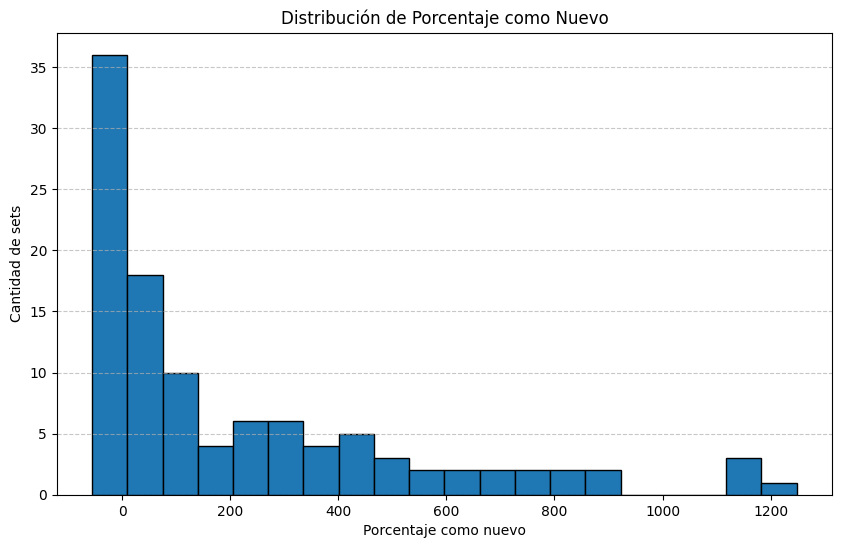

In [79]:
import matplotlib.pyplot as plt

# Crear un gráfico de distribución para la columna "Porcentaje como usado"
plt.figure(figsize=(10, 6))
plt.hist(HP_df['Porcentaje como nuevo'].dropna(), bins=20, edgecolor='black')
plt.title('Distribución de Porcentaje como Nuevo')
plt.xlabel('Porcentaje como nuevo')
plt.ylabel('Cantidad de sets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [80]:
# Identifico el set con la mayor revalorización en "Porcentaje como nuevo"
max_reval_new = HP_df.loc[HP_df['Porcentaje como nuevo'].idxmax()]

# Muestro el set con la mayor revalorización
max_reval_new[['Código del Set', 'Nombre del Set', 'Año de Lanzamiento', 'PVP $', 'Precio como Nuevo $', 'Porcentaje como nuevo']]

Código del Set                     4766
Nombre del Set           Graveyard Duel
Año de Lanzamiento                 2005
PVP $                              30.0
Precio como Nuevo $             404.437
Porcentaje como nuevo           1248.12
Name: 38, dtype: object

In [81]:
# Ordenar el DataFrame por "Porcentaje como nuevo" en orden descendente y seleccionar los 10 primeros
top_10_revalorizados = HP_df.sort_values(by='Porcentaje como nuevo', ascending=False).head(10).reset_index()

# Mostrar las columnas relevantes
top_10_revalorizados = top_10_revalorizados[['Código del Set', 'Nombre del Set', 'Año de Lanzamiento', 'PVP $', 'Precio como Nuevo $', 'Porcentaje como nuevo']]

top_10_revalorizados

,Código del Set,Nombre del Set,Año de Lanzamiento,PVP $,Precio como Nuevo $,Porcentaje como nuevo
0,4766,Graveyard Duel,2005,30.0,404.437,1248.12
1,4701,Sorting Hat,2001,7.0,87.659,1152.27
2,4721,Hogwarts Classrooms,2001,10.0,124.168,1141.68
3,4762,Rescue from the Merpeople,2005,20.0,244.926,1124.63
4,4767,Harry and the Hungarian Horntail,2005,30.0,294.921,883.07
5,4723,Diagon Alley Shops,2001,10.0,98.164,881.64
6,4720,Knockturn Alley,2003,20.0,182.248,811.24
7,4722,Gryffindor,2001,10.0,90.849,808.49
8,4712,Troll on the Loose,2002,10.0,88.627,786.27
9,4751,Harry and the Marauder's Map,2004,10.0,87.428,774.28
